## Call Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

## Helper Functions

In [2]:
def calculate_RMSE(y_pred, y_true):
  return np.sqrt(np.mean([(y_true - y_pred)**2]))

def strip(string):
  ## Pulls everything until space from local_datetime
  ## For making xticks for exploratory plots
    sep = ' '
    stripped = string.split(sep, 1)[0]
    return stripped

## Read In and Explore Data

In [3]:
## Read in data
dat = pd.read_csv("aq_milan_summer_2020.csv")
dat.head()

,local_datetime,pm2p5
0,2020-07-24 18:00:00,11.67
1,2020-07-24 19:00:00,9.25
2,2020-07-24 20:00:00,6.29
3,2020-07-24 21:00:00,5.50
4,2020-07-24 22:00:00,9.50


Text(0, 0.5, 'pm2p5')

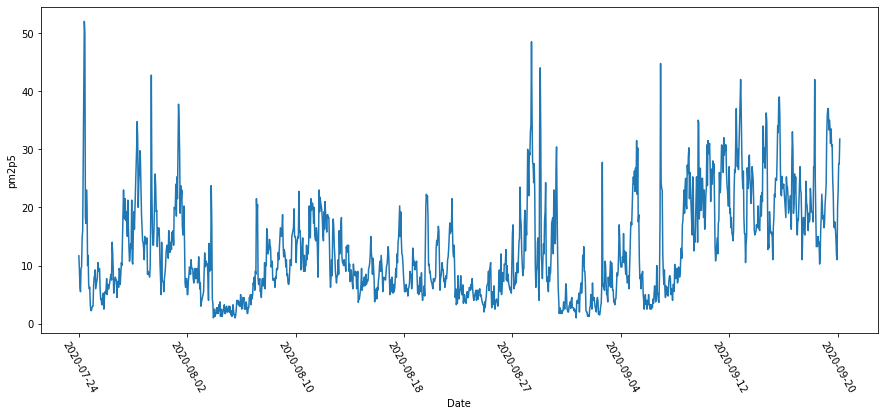

In [4]:
## PLOT DATA
import matplotlib.pyplot as plt
# from datetime import datetime

## Make xtick array
xtick_ary = [strip(dat['local_datetime'][0]), strip(dat['local_datetime'][200]), 
            strip(dat['local_datetime'][400]),strip(dat['local_datetime'][600]), 
            strip(dat['local_datetime'][800]),strip(dat['local_datetime'][1000]),
            strip(dat['local_datetime'][1200]),strip(dat['local_datetime'][1390])]

# Plot data points over time
plt.figure(figsize = (15,6))
dat['pm2p5'].plot()
plt.xticks(np.arange(len(dat), step = 199), xtick_ary, rotation = 300)
plt.xlabel('Date')
plt.ylabel('pm2p5')

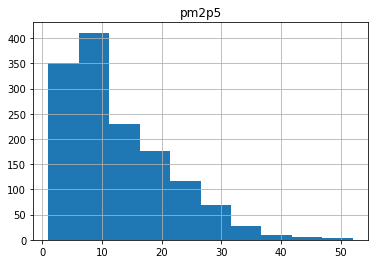

In [5]:
# Histogram of data
dat.hist()
plt.show()

Seasonality component, and it is possibly growing. Could be exponential growth from season to season. May want to log transform to get a more linear relationship (https://machinelearningmastery.com/time-series-data-stationary-python/)

In [6]:
# Check mean and variance of first and second half
X = dat['pm2p5'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=10.691817, mean2=14.645908
variance1=42.806525, variance2=96.101259


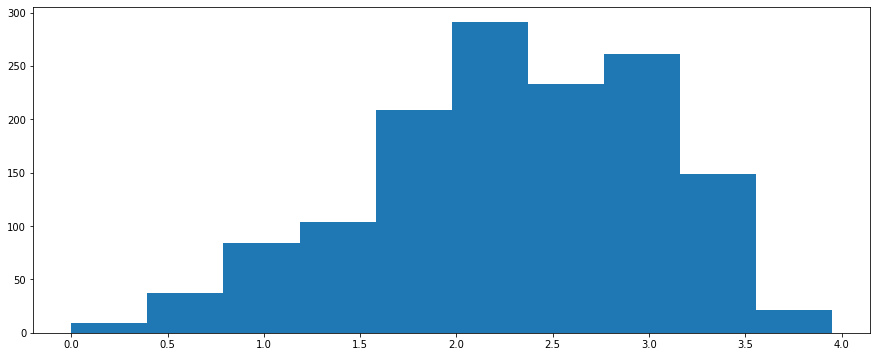

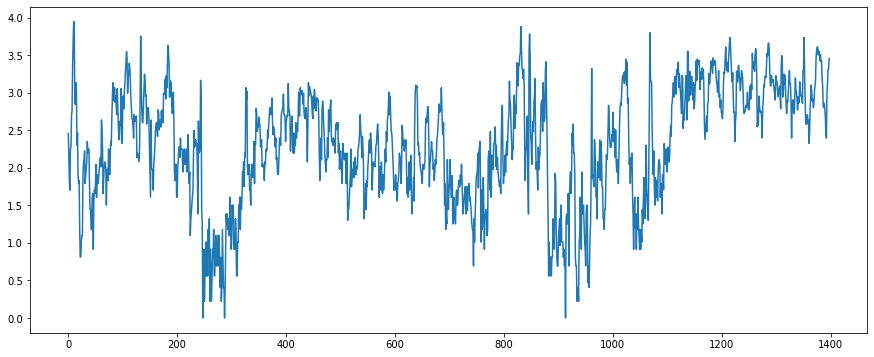

In [7]:
# Log transform data
X = dat['pm2p5'].values
X = np.log(X)

# Plot histogram of transformed data
plt.figure(figsize = (15,6))
plt.hist(X)
plt.show()

# Plot transformed data across time
plt.figure(figsize = (15,6))
plt.plot(X)
plt.show()

#### Issue: test dataset looks different than training dataset

In [8]:
# Transform data
dat['pm2p5'] = np.log(dat['pm2p5'].values)

## Split into train and test
train = dat.iloc[:int(0.8*len(dat)),:]
test = dat.iloc[int(0.8*len(dat)):,:]

In [9]:
## Describe data
# Number of observation
print("Number of Obs:", len(dat))
print("Obs in train:", len(train))
print("Obs in test:", len(test))

# Number of obs per day: should be 24
# Range of pm2p5
print("Range:", np.min(dat['pm2p5']), np.max(dat['pm2p5']))

# Start and end date: 2020-07-24 to 2020-09-20

Number of Obs: 1398
Obs in train: 1118
Obs in test: 280
Range: 0.0 3.9512437185814275


## ARIMA

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA

Figure(432x288)
Figure(432x288)


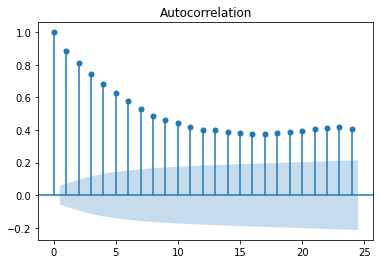

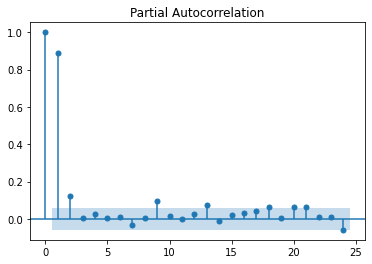

In [11]:
# ACF
acf_plot = plot_acf(train['pm2p5'], lags = 24)
print(acf_plot)
# PACF
pacf_plot =plot_pacf(train['pm2p5'], lags = 24)
print(pacf_plot)

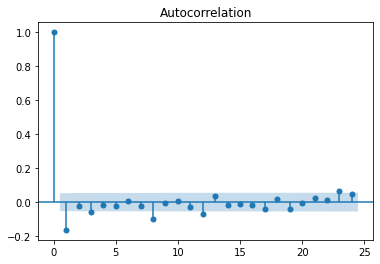

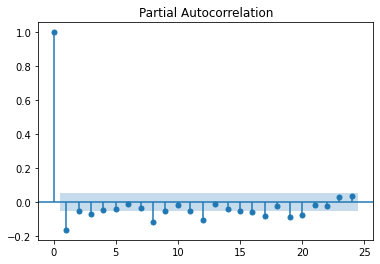

In [12]:
roll_diff = pd.Series(dat['pm2p5'].diff(periods=1))
plot_acf(x=roll_diff.values[1:], lags=24)
plt.show()
plot_pacf(roll_diff.values[1:], lags = 24)
plt.show()

In [13]:
# 1,1,1 ARIMA Model
ARIMA_model = ARIMA(train['pm2p5'].values, order=(1,1,1))
ARIMA_model_fit = ARIMA_model.fit(disp=0)
print(ARIMA_model_fit.summary())

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1117
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -314.968
Method:                       css-mle   S.D. of innovations              0.321
Date:                Thu, 16 Dec 2021   AIC                            637.937
Time:                        20:10:51   BIC                            658.010
Sample:                             1   HQIC                           645.525
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.003      0.119      0.905      -0.005       0.006
ar.L1.D.y      0.7771      0.033     23.801      0.000       0.713       0.841
ma.L1.D.y     -0.9361      0.019    -50.525      0.0

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


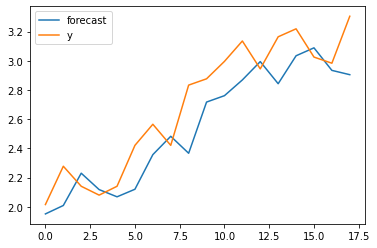

In [14]:
ARIMA_model_fit.plot_predict(dynamic=False,start=1100)
plt.show()

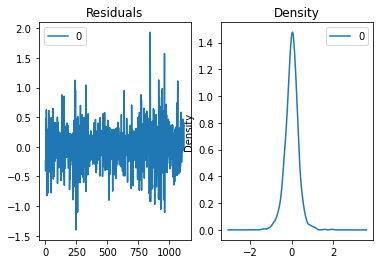

In [15]:
# Plot residual errors
residuals = pd.DataFrame(ARIMA_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [16]:
## RMSE of Residuals
np.sqrt(np.mean(residuals**2))

0    0.320813
dtype: float64

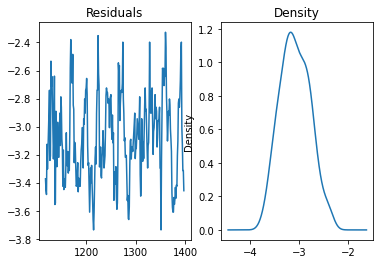

In [17]:
## Make predictions
predict_result = ARIMA_model_fit.predict(start = 1118, end = 1397)
test_residual = (predict_result - test['pm2p5'])
fig, ax = plt.subplots(1,2)
test_residual.plot(title="Residuals", ax=ax[0]) # scatterplot? 
test_residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [23]:
np.sqrt(np.mean(test_residual**2))

3.0917125330574957

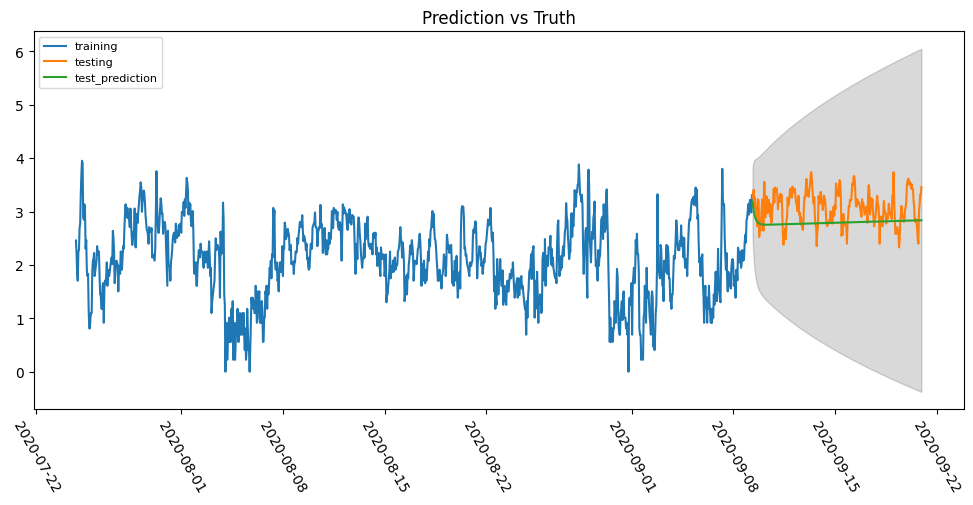

In [27]:
train_x = train['local_datetime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
test_x = test['local_datetime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

fc, se, conf = ARIMA_model_fit.forecast(280, alpha=0.05) 
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_x, train['pm2p5'], label='training')
plt.plot(test_x, test['pm2p5'], label='testing')
plt.plot(test_x, fc_series, label='test_prediction')
plt.fill_between(test_x, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Prediction vs Truth')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation = 300)
plt.show()

In [28]:
calculate_RMSE(fc_series, test['pm2p5'])

0.40940471068473555

## Kalman Filter with EM for Parameter Learning

In [34]:
from pykalman import KalmanFilter

train_dat =train.copy()
test_dat =test.copy()

In [35]:
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

y_test_pred, y_test_covar = kf.em(train_dat['pm2p5']).smooth(test_dat['pm2p5'])

y_train_pred,_ = kf.smooth(train_dat['pm2p5'])

y_test_sd = np.sqrt(y_test_covar)

test_dat['pm2p5_pred'] = y_test_pred

test_dat['local_datetime'] = test_dat['local_datetime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
train_dat['local_datetime'] = train_dat['local_datetime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

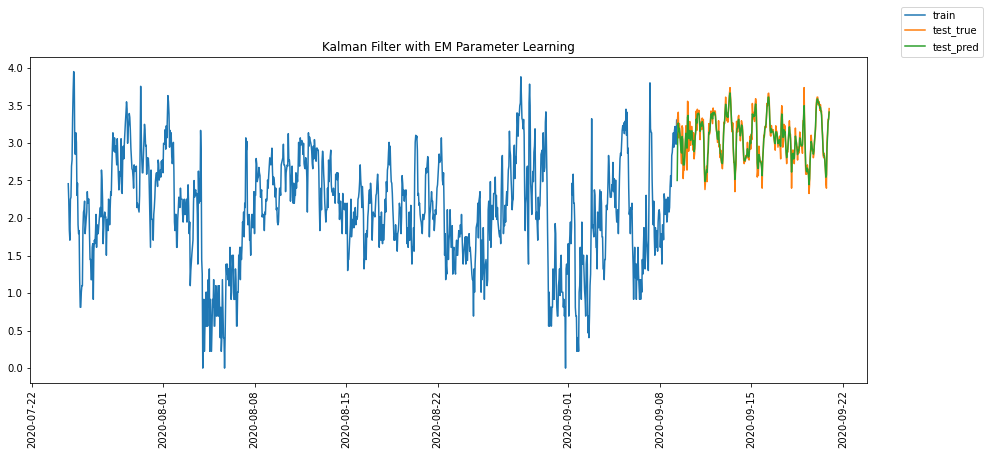

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
line_train,  = ax.plot(train_dat['local_datetime'], train_dat['pm2p5'])
# line_train_pred,  = ax.plot(train_dat['local_datetime'], y_train_pred)
line_true,  = ax.plot(test_dat['local_datetime'], test_dat['pm2p5'])
line_pred, = ax.plot(test_dat['local_datetime'], test_dat['pm2p5_pred'])
ax.legend([line_train, line_true,line_pred],['train','test_true','test_pred'], loc = (1.04,1))
plt.title('Kalman Filter with EM Parameter Learning')
plt.xticks(rotation = 90)
plt.show()

In [37]:
calculate_RMSE(test_dat['pm2p5_pred'], test_dat['pm2p5'])

0.0833705438957646

## HMM

In [ ]:
import random
from hmmlearn import hmm
from sklearn.utils import check_random_state

In [ ]:
## Import and divide data again
dat = pd.read_csv("aq_milan_summer_2020.csv")
X = dat['pm2p5'].values
X1, X2 = pd.DataFrame(X[0:1118], columns = ["pm2p5"]), pd.DataFrame(X[1119:len(dat)], columns = ["pm2p5"])
X1, X2 = np.log(X1), np.log(X2)

# spaces for model comparison diagnostics
train_rmse = []
train_rmse_var = []
train_range = [2,3,4,5,6,7,8,9,10]

#### Try different numbers of states

For each model (with components ranging from 2 to 10):
1. Fit the model
2. Make 100 sets of predictions over the training data space
3. Calculate the mean and variance of the RMSE of each set of predections
4. Append mean and variance to named objects to compare models at the end

All HMM code takes about 5 mintues to run.

In [ ]:
## 2 components

# initialize HMM model using pre-packaged algorithm hmmlearn
em2 = hmm.GaussianHMM(n_components=2, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em2.transmat_ = np.array([[0.4, 0.6],
                      [0.5, 0.5]])
em2.startprob_ = np.array([0.2, 0.6, 0.2])

# run the EM algorithm to train the parameters of the model
em2.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em2._do_viterbi_pass
dat3 = em2.decode(X1, algorithm = 'viterbi')

#plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])
#plt.scatter(np.arange(1119, len(X)), X2['pm2p5'], c = dat3[1])

# Prediction to test model
comp2_rmse = []
n_pred = 1118
states = em2.predict(X1)
transmat_sum = np.cumsum(em2.transmat_, axis=1)
random_state = check_random_state(em2.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em2._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp2_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp2_rmse))
train_rmse_var.append(np.var(comp2_rmse))

In [ ]:
## 3 components

em3 = hmm.GaussianHMM(n_components=3, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em3.transmat_ = np.array([[0.4, 0.2, 0.4],
                      [0.4, 0.2, 0.4],
                         [0.4, 0.2, 0.4]])
em3.startprob_ = np.array([0.2, 0.6, 0.2])

# run the EM algorithm to train the parameters of the model
em3.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em3._do_viterbi_pass
dat3 = em2.decode(X1, algorithm = 'viterbi')

#plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])
#plt.scatter(np.arange(1119, len(X)), X2['pm2p5'], c = dat3[1])

## Prediction to test model
comp3_rmse = []
states = em3.predict(X1)
transmat_sum = np.cumsum(em3.transmat_, axis=1)
random_state = check_random_state(em3.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em3._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp3_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp3_rmse))
train_rmse_var.append(np.var(comp3_rmse))

In [ ]:
## 4 components

em4 = hmm.GaussianHMM(n_components=4, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em4.transmat_ = np.array([[0.2, 0.2, 0.4, 0.2],
                          [0.3, 0.2, 0.3, 0.2],
                          [0.2, 0.3, 0.1, 0.4],
                          [0.2, 0.3, 0.1, 0.4]])
em4.startprob_ = np.array([0.2, 0.4, 0.2, 0.2])

# run the EM algorithm to train the parameters of the model
em4.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em4._do_viterbi_pass
dat3 = em4.decode(X1, algorithm = 'viterbi')

plt.figure(figsize=(12,5), dpi=100)
plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])
plt.xticks(np.arange(len(X1), step = 200), xtick_ary[0:6], rotation = 300)

plt.title("Observed Data State Predictions (n = 4)")

## Prediction to test model
comp4_rmse = []
states = em4.predict(X1)
transmat_sum = np.cumsum(em4.transmat_, axis=1)
random_state = check_random_state(em4.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em4._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp4_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp4_rmse))
train_rmse_var.append(np.var(comp4_rmse))

In [ ]:
## 5 components

em5 = hmm.GaussianHMM(n_components=5, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em5.transmat_ = np.array([[0.6, 0.1, 0.1, 0.1, 0.1],
                          [0.2, 0.2, 0.2, 0.2, 0.2],
                          [0.2, 0.2, 0.2, 0.2, 0.2],
                          [0.6, 0.1, 0.1, 0.1, 0.1],
                          [0.2, 0.2, 0.2, 0.2, 0.2]])
em5.startprob_ = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# run the EM algorithm to train the parameters of the model
em5.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em5._do_viterbi_pass
dat3 = em5.decode(X1, algorithm = 'viterbi')

#plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])

## Prediction to test model
comp5_rmse = []
states = em5.predict(X1)
transmat_sum = np.cumsum(em5.transmat_, axis=1)
random_state = check_random_state(em5.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em5._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp5_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp5_rmse))
train_rmse_var.append(np.var(comp5_rmse))

In [ ]:
## 6 components

em6 = hmm.GaussianHMM(n_components=6, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em6.transmat_ = np.array([[0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.2, 0.2, 0.2, 0.2, 0.1, 0.1],
                          [0.2, 0.2, 0.2, 0.2, 0.1, 0.1],
                          [0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.2, 0.2, 0.2, 0.2, 0.1, 0.1]])
em6.startprob_ = np.array([0.2, 0.1, 0.2, 0.2, 0.1, 0.2])

# run the EM algorithm to train the parameters of the model
em6.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em6._do_viterbi_pass
dat3 = em6.decode(X1, algorithm = 'viterbi')

plt.figure(figsize=(12,5), dpi=100)
plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])
plt.xticks(np.arange(len(X1), step = 200), xtick_ary[0:6], rotation = 300)

plt.title("Observed Data State Predictions (n = 6)")

## Prediction to test model
comp6_rmse = []
states = em6.predict(X1)
transmat_sum = np.cumsum(em6.transmat_, axis=1)
random_state = check_random_state(em6.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em6._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp6_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp6_rmse))
train_rmse_var.append(np.var(comp6_rmse))

In [ ]:
## 7 components

em7 = hmm.GaussianHMM(n_components=7, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em7.transmat_ = np.array([[0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2],
                          [0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
                          [0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]])
em7.startprob_ = np.array([0.1, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2])

# run the EM algorithm to train the parameters of the model
em7.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em7._do_viterbi_pass
dat3 = em7.decode(X1, algorithm = 'viterbi')

#plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])

## Prediction to test model
comp7_rmse = []
states = em7.predict(X1)
transmat_sum = np.cumsum(em7.transmat_, axis=1)
random_state = check_random_state(em7.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em7._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp7_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp7_rmse))
train_rmse_var.append(np.var(comp7_rmse))

In [ ]:
## 8 components

em8 = hmm.GaussianHMM(n_components=8, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em8.transmat_ = np.array([[0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1],
                          [0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1]])
em8.startprob_ = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2])

# run the EM algorithm to train the parameters of the model
em8.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em8._do_viterbi_pass
dat3 = em8.decode(X1, algorithm = 'viterbi')

#plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])

## Prediction to test model
comp8_rmse = []
states = em8.predict(X1)
transmat_sum = np.cumsum(em8.transmat_, axis=1)
random_state = check_random_state(em8.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em8._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp8_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp8_rmse))
train_rmse_var.append(np.var(comp8_rmse))

In [ ]:
## 9 components

em9 = hmm.GaussianHMM(n_components=9, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em9.transmat_ = np.array([[0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1],
                          [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1]])
em9.startprob_ = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2])

# run the EM algorithm to train the parameters of the model
em9.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em9._do_viterbi_pass
dat3 = em9.decode(X1, algorithm = 'viterbi')

plt.figure(figsize=(12,5), dpi=100)
plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])
plt.xticks(np.arange(len(X1), step = 200), xtick_ary[0:6], rotation = 300)

plt.title("Observed Data State Predictions (n = 9)")

## Prediction to test model
comp9_rmse = []
states = em9.predict(X1)
transmat_sum = np.cumsum(em9.transmat_, axis=1)
random_state = check_random_state(em9.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em9._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp9_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp9_rmse))
train_rmse_var.append(np.var(comp9_rmse))

In [ ]:
## 10 components

em10 = hmm.GaussianHMM(n_components=10, covariance_type = "full", n_iter = 100, init_params="mcs")

# set initial transition matrices and starting probabilities
em10.transmat_ = np.array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])
em10.startprob_ = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# run the EM algorithm to train the parameters of the model
em10.fit(X1)

# do inference by viterbi with the estimated parameters to generate the plot that attributes individual data points to classes
em10._do_viterbi_pass
dat3 = em10.decode(X1, algorithm = 'viterbi')

#plt.scatter(np.arange(len(X1)), X1["pm2p5"], c = dat3[1])

## Prediction to test model
comp10_rmse = []
states = em10.predict(X1)
transmat_sum = np.cumsum(em10.transmat_, axis=1)
random_state = check_random_state(em10.random_state)
for j in np.arange(100):
    prediction = []
    for i in np.arange(n_pred):
        next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
        next_obs = em10._generate_sample_from_state(next_state, random_state)

        states = np.append(states, next_state)
        prediction.append(next_obs)

    comp10_rmse.append(np.sqrt(np.sum((np.array(X1['pm2p5']) - np.concatenate(prediction, axis = 0))**2)/len(prediction)))
    
train_rmse.append(np.mean(comp10_rmse))
train_rmse_var.append(np.var(comp10_rmse))

In [ ]:
plt.figure()

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_range, train_rmse)
plt.xlabel('Number of Components')
plt.ylabel('RMSE')

### Prediction on Test Data Space

In [ ]:
n_pred = 279
prediction = []
states = em6.predict(X1)
transmat_sum = np.cumsum(em6.transmat_, axis=1)
random_state = check_random_state(em6.random_state)

for i in np.arange(n_pred):
    next_state = (transmat_sum[states[-1]] > random_state.rand()).argmax()
    next_obs = em6._generate_sample_from_state(next_state, random_state)

    states = np.append(states, next_state)
    prediction.append(next_obs)

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.scatter(np.arange(len(dat)), np.log(dat["pm2p5"]), label = "True")
plt.scatter(np.arange(1119, len(X)), prediction, c = "red", label = "Prediction")
plt.xticks(np.arange(len(dat), step = 199), xtick_ary, rotation = 300)
plt.legend(loc = "lower left")

In [ ]:
## HMM average error
calculate_RMSE(np.concatenate(prediction, axis = 0), np.array(X2['pm2p5']))

## Gaussian Process

In [ ]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel, ExpSineSquared, RationalQuadratic

In [ ]:
## Plot GP function -- credit to PTSA lab course
def plot_gp(x_pred, y_pred, sigmas, x_train, y_train, true_y=None, samples=None, true_test = None):
    """
    Function that plots the GP mean & std on top of given points.
    x_pred: points for prediction
    y_pred: means
    sigmas: std
    x, y: given data
    true_y: 
    samples: 2D numpy array with shape (# of points, # of samples)
    """
    fig, ax = plt.subplots(figsize=(15,6))
    if samples is not None:
        plt.plot(all_x.reshape(-1, 1), samples)
    
    plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0, 
                 ecolor=(0.85, 0.85, 0.85), fmt = "r-", 
                 label="pred mean")
    plt.plot(np.arange(len(x_train)), y_train, "ko", label="training set")
    if true_y is not None:
        plt.plot(x_train, true_y, "b-", label="truth function")
    if true_test is not None:
      plt.scatter(x_pred, true_test, label = "true test data")
    plt.legend(loc = "upper left")
    plt.xticks(np.arange(len(dat), step = 199), xtick_ary, rotation = 300)

In [ ]:
X_list = np.atleast_2d(np.arange(1,len(X1)+1)).T

## Fit the gp
kernel = 7*Matern() + ExpSineSquared()*RBF() + RationalQuadratic() + RBF() + WhiteKernel()

gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X_list, X1['pm2p5'])

print(gp.kernel_)
plt.figure()
plt.imshow(gp.kernel_(np.array([np.arange(len(X_list))]).T))
plt.colorbar()
plt.title('kernel post-fitting')

In [ ]:
# 100 points
lit_x = np.atleast_2d(np.linspace(1, 1118, 100)).T

mus, sigmas = gp.predict(lit_x, return_std = True)

#plt.scatter(lit_x, mus)

plt.figure(figsize = (15,6))
plot_gp(lit_x, mus, sigmas, X_list, X1['pm2p5'], true_y = X1['pm2p5'])
plt.xticks(np.arange(len(X1), step = 200), xtick_ary[0:6], rotation = 300)

In [ ]:
# predicting in test data space
predict_range = np.atleast_2d(np.linspace(1120, len(dat), 279)).T

mus, sigmas = gp.predict(predict_range, return_std=True)

plt.figure(figsize = (15,6))
plt.scatter(np.arange(len(dat)), np.log(dat['pm2p5']), label = "Observed")
plt.scatter(np.linspace(1120, len(dat), 279), mus, c = "red", label = "Predicted")
#plt.plot(predict_range, mus, c = "red")
plt.xticks(np.arange(len(dat), step = 199), xtick_ary, rotation = 300)
plt.legend(loc = "lower left")

In [ ]:
## HMM average error
calculate_RMSE(mus, np.array(X2['pm2p5']))